In [1]:
# required imports
from vivarium.plots.simulation_output import _save_fig_to_dir as save_fig_to_dir
import ast
from escher import Builder
%matplotlib inline
import matplotlib.pyplot as plt
from vivarium.plots.topology import plot_topology

In [2]:
# Import the DynamicFBA class and the main function from the dFBA_process.py file
import sys
sys.path.append('../Models')
from dFBA_processes import DynamicFBA, main



In [6]:
# Set the desired model_path
model_path = "../SBML/e_coli_core.xml"
# Call the main function with the
output, processes, topology = main(model_path)


Simulation ID: dfe88286-e379-11ed-be56-ba21c95c07d9
Created: 04/25/2023 at 11:00:10
Completed in 0.001773 seconds


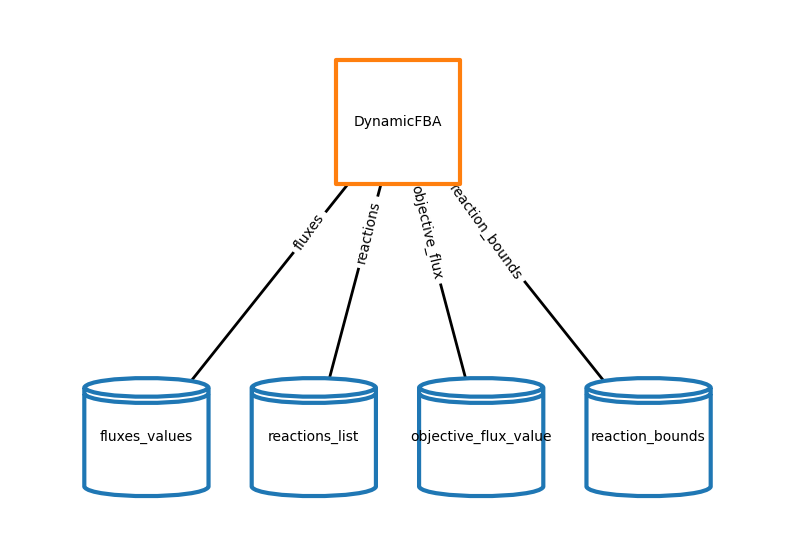

In [7]:
composite = {'processes' : processes , 'topology' : topology , 'steps' : {}, 'flow' : {}}
config ={'font_size' : 10}
fig_topology = plot_topology(composite, config)

In [14]:
# extract the fluxes data
if isinstance(output, str):
    # convert the string to a dictionary
    output = ast.literal_eval(output)
flux_data = output[1]['fluxes_values']
reactions_data = output[1]['reactions_list']
objective_flux_data = output[1]['objective_flux_value']
reaction_bounds_data = output[1]['reaction_bounds']

#Escher
# Load the E. coli core map
builder = Builder(
    map_name="e_coli_core.Core metabolism",     #user should choose it. 
    reaction_data=flux_data,
    show_gene_reaction_rules=False,
)

# Save the Escher plot as an HTML file
builder.save_html("../Plots/escher_plot__dFBA.html")

builder

Builder(reaction_data={'ACALD': 0.0, 'ACALDt': 0.0, 'ACKr': 1.0297466822596379e-15, 'ACONTa': 6.00724957535035…